# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

from IPython.display import display


### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

In [15]:
target = "Attrition"

# 이직률 평균
attrition_mean = data[target].mean()

In [13]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

In [3]:
val = "Gender"

① 교차표(pd.crosstab())

In [19]:
table = pd.crosstab(data[val], data[target], normalize="index")
display(table)

Attrition,0,1
Gender,,
Female,0.859184,0.140816
Male,0.827632,0.172368


② 시각화( Stacked Bar, Mosaic)

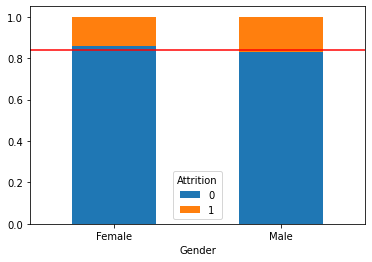

In [23]:
table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)
plt.show()

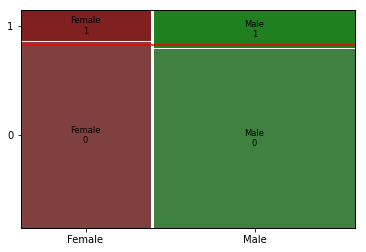

In [26]:
mosaic(data.sort_values([val, target]), [val, target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 이직률과 성별에는 유의미한 차이는 보이지가 않는다
* 다른 변수들과 합쳐서 이직률과의 연관성을 찾아보자
*

③ 가설검정(카이제곱검정)

In [30]:
table = pd.crosstab(data[val], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 1.97825, p-value : 0.15957492990528155


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 시각화에서 확인했던것처럼 가설검정에서도 성별과 이직률에는 유의미한 차이가 보이지 않는다.

#### 2) MaritalStatus --> Attrtion

In [31]:
val = "MaritalStatus"

① 교차표(pd.crosstab())

In [32]:
table = pd.crosstab(data[val], data[target], normalize="index")
display(table)

Attrition,0,1
MaritalStatus,,
Divorced,0.916667,0.083333
Married,0.878947,0.121053
Single,0.732673,0.267327


② 시각화( Stacked Bar, Mosaic)

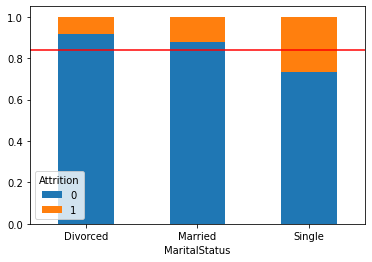

In [33]:
table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)
plt.show()

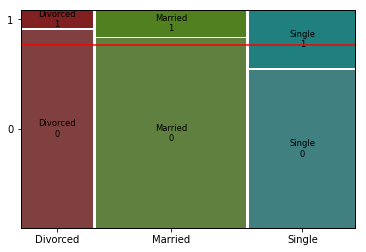

In [34]:
mosaic(data.sort_values([val, target]), [val, target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 시각화의 결과로는 결혼상태와 이직률 사이에 관계가 있어보인다.

③ 가설검정(카이제곱검정)

In [35]:
table = pd.crosstab(data[val], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 53.12936, p-value : 2.9047385436211595e-12


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 시각화에서 확인했던것처럼 가설검정에서도 결혼상태와 이직률에는 유의미한 관계가 있어 보인다.
* 3개의 범주를 2개의 범주로 나누어서 확인

In [132]:
data["MaritalStatus_cut"] = data["MaritalStatus"].map({"Single":0, "Divorced":0, "Married":1})

table = pd.crosstab(data["MaritalStatus_cut"], data[target], normalize="index")
display(table)

Attrition,0,1
MaritalStatus_cut,,
0,0.807353,0.192647
1,0.878947,0.121053


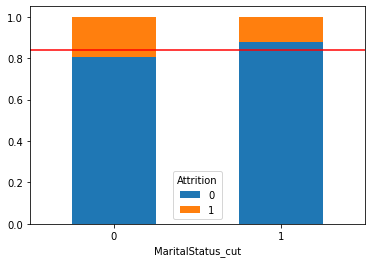

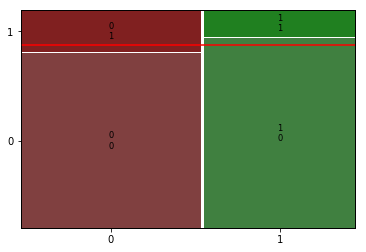

In [135]:
table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)

mosaic(data.sort_values(["MaritalStatus_cut", target]), ["MaritalStatus_cut", target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()

In [136]:
table = pd.crosstab(data[val], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 117.68610, p-value : 4.2424877979580484e-09


#### 3) JobSatisfaction --> Attrtion

In [36]:
val = "JobSatisfaction"

① 교차표(pd.crosstab())

In [37]:
table = pd.crosstab(data[val], data[target], normalize="index")
display(table)

Attrition,0,1
JobSatisfaction,,
1,0.788000,0.212000
2,0.834043,0.165957
3,0.836957,0.163043
4,0.879093,0.120907


② 시각화( Stacked Bar, Mosaic)

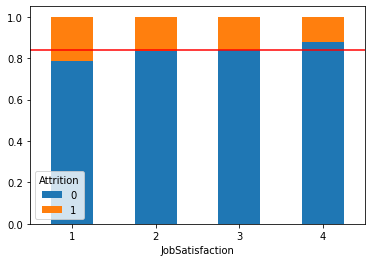

In [38]:
table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)
plt.show()

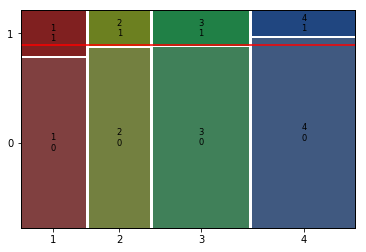

In [39]:
mosaic(data.sort_values([val, target]), [val, target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()


시각화를 통해 파악한 내용을 적어 봅시다.

* 만족도와 이직률에는 관계가 있어보인다.
* 2점과 3점의 경우에는 비슷해보이므로 하나의 범주로 표현해서 확인 필요

③ 가설검정(카이제곱검정)

In [40]:
table = pd.crosstab(data[val], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 9.63151, p-value : 0.021972649369306214


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정에서도 유의미한 관계가 있어보이지만 p-value가 0.02로 0.05에 근사하다.
* 2점과 3점을 하나의 범주로 표현해서 확인

Attrition,0,1
JobSatisfaction_cut,,
1,0.788000,0.212000
2_3,0.835821,0.164179
4,0.879093,0.120907


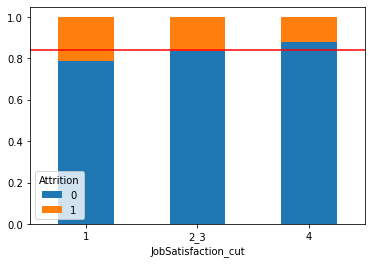

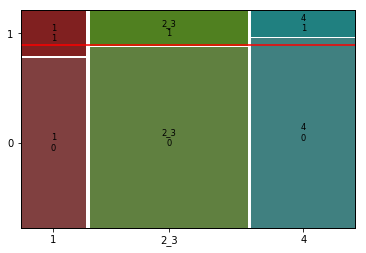

In [52]:
data[val+"_cut"] = data[val].map({1:'1', 2:"2_3", 3:"2_3", 4:'4'})

table = pd.crosstab(data[val+"_cut"], data[target], normalize="index")
display(table)

table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)

mosaic(data.sort_values([val+"_cut", target]), [val+"_cut", target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()

In [50]:
table = pd.crosstab(data[val+"_cut"], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 9.62245, p-value : 0.008137869190485921


#### 4) 추가 --> Attrtion


① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

#### 5) 추가 --> Attrtion

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [116]:
val = "Age"

① 그래프 : histogram, densityplot

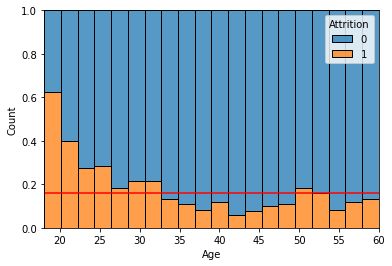

In [117]:
sns.histplot(data=data, x=val, hue=target, multiple="fill", bins=20)
plt.axhline(attrition_mean, color='r')
plt.show()

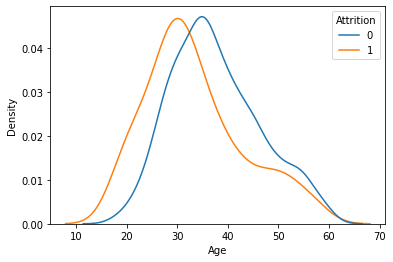

In [118]:
sns.kdeplot(data=data, x=val, hue=target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 약 30대 전후로 이직률의 차이가 있다
* 두개의 범주(30대 전, 30대 후)로 표현해서 확인

② 수치화 : 로지스틱회귀

In [119]:
model = sm.Logit(data[target], data[val])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 나이와 이직률간의 상관은 있어보인다.
* 30대 전후로 이직률의 차이가 있으므로 두개의 범주 혹은 적당한 구간으로 나누어서 확인

In [126]:
data["Age_cut"] = pd.cut(data[val], bins=[0, 30, np.inf], labels=["under_30", "over_30"], right=False)

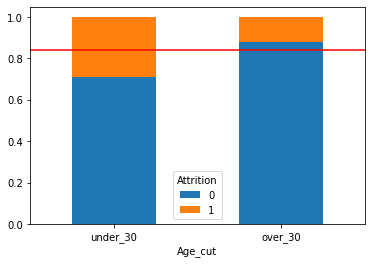

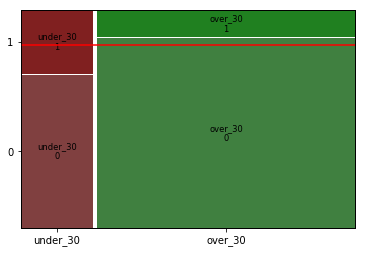

In [129]:
table = pd.crosstab(data["Age_cut"], data[target], normalize="index")

table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)

mosaic(data.sort_values([val+"_cut", target]), [val+"_cut", target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()

In [130]:
table = pd.crosstab(data["Age_cut"], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 44.22553, p-value : 2.9263977577460336e-11


#### 2) DistanceFromHome --> Attrtion


In [72]:
val = "DistanceFromHome"

① 그래프 : histogram, densityplot

* 결측치가 존재하긴하나 0.04%로 중요성이 낮아보인다.
* 혹은 근무지와 거리가 너무 가까워 미입력 가능성이 있다

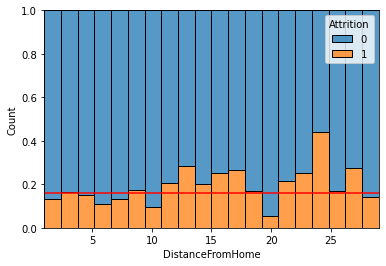

In [86]:
sns.histplot(data=data, x=val, hue=target, multiple="fill", bins=20)
plt.axhline(attrition_mean, color='r')
plt.show()

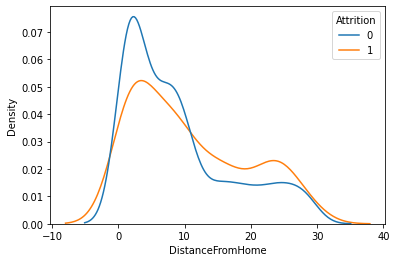

In [79]:
sns.kdeplot(data=data, x=val, hue=target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 특정 거리에서부터 이직률이 증가한다.
* 거리를 구간별로 나누어서 이직률을 확인

>

② 수치화 : 로지스틱회귀

In [96]:
print("결측치수:", data[val].isna().sum())
print("결측치비율:", data[val].isna().sum()/len(data))

결측치수: 54
결측치비율: 0.0432


In [94]:
# 최대빈도
print(data[val].value_counts().head())

2.0     178
1.0     163
10.0     72
7.0      69
8.0      68
Name: DistanceFromHome, dtype: int64


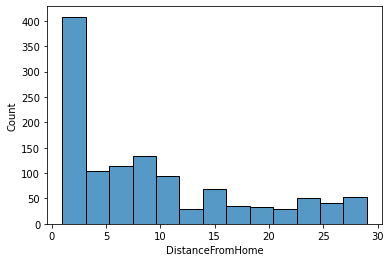

In [89]:
sns.histplot(data=data, x=val)
plt.show()

In [105]:
print(data[val].value_counts().index[0])

2.0


In [106]:
data["fill_dist"] = data[val].fillna(data[val].value_counts().index[0])

model = sm.Logit(data[target], data["fill_dist"])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.570787
         Iterations 6
fill_dist    4.999779e-45
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 거리와 이직률간의 관계는 유의미하다고 볼수 있다.

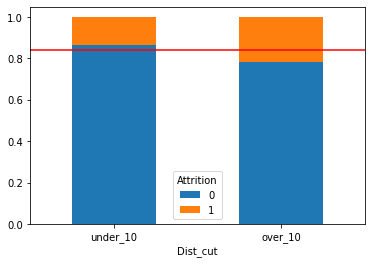

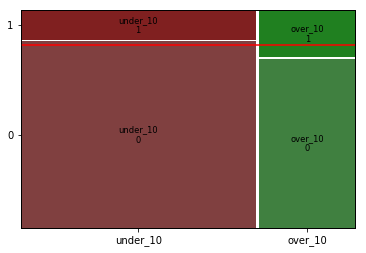

In [139]:
data["Dist_cut"] = pd.cut(data["fill_dist"], bins=[0, 10, np.inf], labels=["under_10", "over_10"], right=True)

table = pd.crosstab(data["Dist_cut"], data[target], normalize="index")

table.plot.bar(stacked=True)
plt.axhline(1-attrition_mean, color='r')
plt.xticks(rotation=0)

mosaic(data.sort_values(["Dist_cut", target]), ["Dist_cut", target], gap=.01)
plt.axhline(1-attrition_mean, color='r')
plt.show()

In [140]:
table = pd.crosstab(data["Dist_cut"], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 12.04459, p-value : 0.0005194294623315527


> 

#### 3) MonthlyIncome --> Attrtion


In [107]:
val = "MonthlyIncome"

① 그래프 : histogram, densityplot

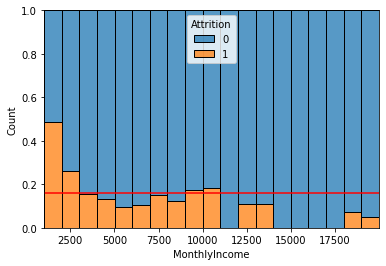

In [113]:
sns.histplot(data=data, x=val, hue=target, multiple="fill")
plt.axhline(attrition_mean, color='r')
plt.show()

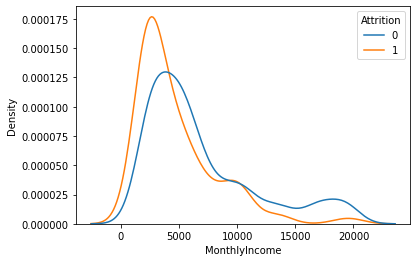

In [114]:
sns.kdeplot(data=data, x=val, hue=target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

*

② 수치화 : 로지스틱회귀

In [115]:
model = sm.Logit(data[target], data[val])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 4) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

#### 5) 추가 --> Attrtion


① 그래프 : histogram, densityplot

시각화를 통해 파악한 내용을 적어 봅시다.

> 

② 수치화 : 로지스틱회귀

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> 

## 4.관계 정리

### 1) 강한관계의 변수

### 2) 중간관계의 변수

### 3) (거의)관계 없음

## 5. 추가 분석

### 1) 분석1

### 2) 분석2

### 3) 분석3

### 4) 분석4